##Introduction to the CO2 Emission of Cars Dataset
###The CO2 Emission of Cars dataset from Kaggle contains data related to various car models and their corresponding CO2 emissions. The dataset is typically used to explore the relationship between vehicle characteristics and their environmental impact, particularly focusing on the factors contributing to CO2 emissions. The key attributes usually include features like engine size, fuel consumption, number of cylinders, vehicle weight, fuel type, and more, which are indicative of a vehicle’s emission profile.
##Dataset Features
###The dataset often consists of the following columns:

1. Make: The manufacturer or brand of the vehicle.
2. Model: Specific car model.
3. Engine Size (L): The size of the engine in liters.
4. Cylinders: Number of cylinders in the engine.
5. Fuel Consumption (City/Highway): Fuel consumption measured in liters per 100 kilometers (L/100km).
6. CO2 Emissions (g/km): Grams of CO2 emitted per kilometer, which is the target variable for prediction.
7. Fuel Type: Type of fuel used (e.g., Gasoline, Diesel, etc.).

###These features are crucial for understanding the emission levels of vehicles and for building predictive models that can accurately estimate CO2 emissions.

##Importing Necessary Libraries

In [1]:
import numpy as np # NumPy is a powerful tool for numerical computations in Python
import pandas as pd # Pandas is a powerful library for data manipulation and analysis.

In [2]:
df = pd.read_csv("DATA.csv")  #The df = pd.read_csv line reads a CSV file into a DataFrame named df using the pandas library.

In [3]:
df.head() # Displays the first five rows of the DataFrame, allowing you to quickly preview the data.

,Car,Model,Volume,Weight,CO2,Unnamed: 5
0,Toyota,Aygo,1000,790,99,NaN
1,Mitsubishi,Space Star,1200,1160,95,NaN
2,Skoda,Citigo,1000,929,95,NaN
3,Fiat,500,900,865,90,NaN
4,Mini,Cooper,1500,1140,105,NaN


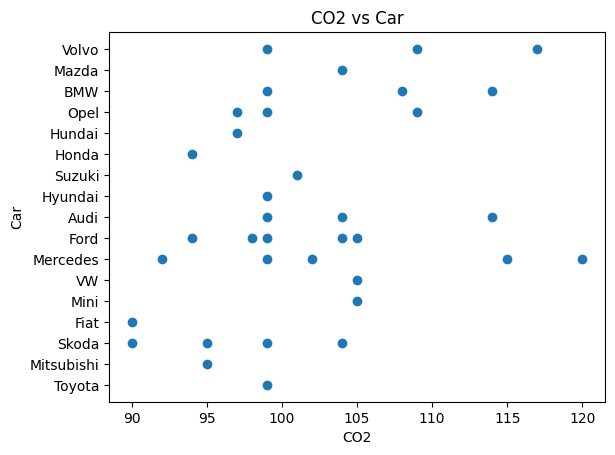

In [4]:
import matplotlib.pyplot as plt
#This code creates a scatter plot showing the relationship between CO2 emissions and car models, with CO2 on the x-axis and car models on the y-axis.
plt.scatter(df['CO2'],df['Car'])
plt.xlabel('CO2')
plt.ylabel('Car')
plt.title('CO2 vs Car')
plt.show()

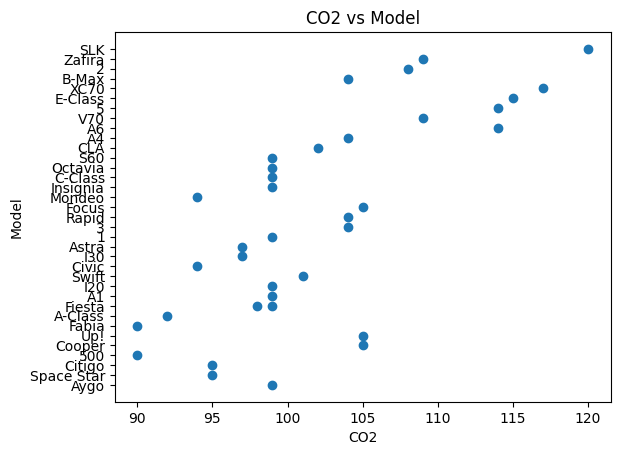

In [5]:
plt.scatter(df['CO2'],df['Model'])
plt.xlabel('CO2')
plt.ylabel('Model')
plt.title('CO2 vs Model')
plt.show()

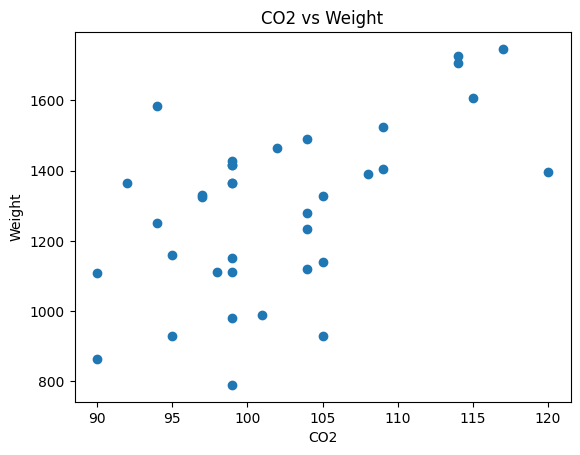

In [6]:
plt.scatter(df['CO2'],df['Weight'])
plt.xlabel('CO2')
plt.ylabel('Weight')
plt.title('CO2 vs Weight')
plt.show()

In [7]:
df.shape # Displays the total count of the Rows and Columns respectively.

(36, 6)

In [8]:
df.isnull().sum() #Is used to display the dimensions of the DataFrame df. Giving you a quick overview of the size of your dataset.

,0
Car,0
Model,0
Volume,0
Weight,0
CO2,0
Unnamed: 5,36


In [9]:
df.info() #Displays the total count of values present in the particular column along with the null count and data type.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Car         36 non-null     object 
 1   Model       36 non-null     object 
 2   Volume      36 non-null     int64  
 3   Weight      36 non-null     int64  
 4   CO2         36 non-null     int64  
 5   Unnamed: 5  0 non-null      float64
dtypes: float64(1), int64(3), object(2)
memory usage: 1.8+ KB


###NO Null values found.

In [10]:
df[df.duplicated()] #This code returns the count of duplicate rows in the DataFrame df.

,Car,Model,Volume,Weight,CO2,Unnamed: 5


###No duplicate values present in the dataset

In [11]:
# Drop unnecessary columns as it does not contribute to the finding the result.
df = df.drop(columns=['Unnamed: 5'])

# Check for nulls in important columns
print(df.isnull().sum())


Car       0
Model     0
Volume    0
Weight    0
CO2       0
dtype: int64


In [12]:
# One-hot encoding for categorical variables
data = pd.get_dummies(df, columns=['Car', 'Model'], drop_first=True)

# Display the updated dataset
print(df.head())


          Car       Model  Volume  Weight  CO2
0      Toyota        Aygo    1000     790   99
1  Mitsubishi  Space Star    1200    1160   95
2       Skoda      Citigo    1000     929   95
3        Fiat         500     900     865   90
4        Mini      Cooper    1500    1140  105


* Converts categorical variables ('Car' and 'Model') into numerical format by creating dummy/one-hot encoded variables.
* drop_first=True removes the first category from each variable to avoid multicollinearity, which is common in linear models.
* The result is a DataFrame with the original data plus new binary columns for each category of 'Car' and 'Model', except the first category.

In [13]:
from sklearn.model_selection import train_test_split

# Features and target variable
X = data.drop(columns=['CO2'])
y = data['CO2']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


* X = data.drop(columns=['CO2']): Creates the feature matrix X by dropping the target variable ('CO2') from the dataset.
* y = data['CO2']: Assigns the target variable ('CO2') to y, which will be predicted using the features in X.

* Splits the dataset into training and testing sets.
* test_size=0.2 means 20% of the data is used for testing, and 80% for training.
* random_state=42 ensures reproducibility by fixing the random seed.
* The resulting splits are:
**   X_train, y_train: Training data (80%).
**   X_test, y_test: Testing data (20%).

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error


In [15]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

* scaler = StandardScaler(): Initializes the scaler to normalize features by removing the mean and scaling to unit variance.
* X_train_scaled = scaler.fit_transform(X_train): Fits the scaler to the training data and transforms it.
* X_test_scaled = scaler.transform(X_test): Transforms the test data using the same scaling learned from the training data (without refitting).

In [16]:
# Ridge (L2) Regularization
ridge = Ridge(alpha=1.0)  # Adjust alpha for tuning
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)
ridge_mse = mean_squared_error(y_test, y_pred_ridge)

The code trains a Ridge regression model and evaluates its performance:

* ridge = Ridge(alpha=1.0): Initializes a Ridge regression model with an L2 regularization strength of 1.0 (you can adjust alpha to control regularization).
* ridge.fit(X_train_scaled, y_train): Trains the Ridge model on the scaled training data.
* y_pred_ridge = ridge.predict(X_test_scaled): Predicts CO2 emissions for the scaled test data.
* ridge_mse = mean_squared_error(y_test, y_pred_ridge): Calculates the mean squared error (MSE) of the predictions to evaluate model accuracy.

In [17]:
# Lasso (L1) Regularization
lasso = Lasso(alpha=0.1)  # Adjust alpha for tuning
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)
lasso_mse = mean_squared_error(y_test, y_pred_lasso)

This code trains a Lasso regression model and evaluates its performance:

* lasso = Lasso(alpha=0.1): Initializes a Lasso regression model with an L1 regularization strength of 0.1 (you can adjust alpha to control regularization).
* lasso.fit(X_train_scaled, y_train): Trains the Lasso model on the scaled training data.
* y_pred_lasso = lasso.predict(X_test_scaled): Predicts CO2 emissions for the scaled test data.
* lasso_mse = mean_squared_error(y_test, y_pred_lasso): Computes the mean squared error (MSE) to evaluate the model’s performance, indicating how well the model predicts on unseen data.

In [18]:
print(f'Ridge MSE: {ridge_mse}')
print(f'Lasso MSE: {lasso_mse}')

Ridge MSE: 96.15423760095288
Lasso MSE: 132.14482668567703


In [19]:
from sklearn.model_selection import GridSearchCV

# Ridge Hyperparameter Tuning
ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5)
ridge_grid.fit(X_train_scaled, y_train)
print(f'Best Ridge Alpha: {ridge_grid.best_params_}')

Best Ridge Alpha: {'alpha': 10}


This code performs hyperparameter tuning for Ridge regression using cross-validation:

* ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}: Defines a range of alpha values to test for Ridge regression.
* ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5): Initializes a grid search with 5-fold cross-validation to find the best alpha value.
* ridge_grid.fit(X_train_scaled, y_train): Fits the grid search to the scaled training data to evaluate different alpha values.
* print(f'Best Ridge Alpha: {ridge_grid.best_params_}'): Prints the alpha value that resulted in the best performance during cross-validation.

In [20]:
# Ridge (L2) Regularization
ridge = Ridge(alpha=10)  # Adjusting the alpha after hyperparameter Tuning.
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)
ridge_mse = mean_squared_error(y_test, y_pred_ridge)

In [21]:
print(f'Ridge MSE: {ridge_mse}')

Ridge MSE: 95.77770592628974


In [22]:
# Lasso Hyperparameter Tuning
lasso_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
lasso_grid = GridSearchCV(Lasso(), lasso_params, cv=5)
lasso_grid.fit(X_train_scaled, y_train)
print(f'Best Lasso Alpha: {lasso_grid.best_params_}')

Best Lasso Alpha: {'alpha': 1}


This code performs hyperparameter tuning for Lasso regression using cross-validation:

* lasso_params = {'alpha': [0.01, 0.1, 1, 10, 100]}: Defines a range of alpha values to test for Lasso regression.
* lasso_grid = GridSearchCV(Lasso(), lasso_params, cv=5): Initializes a grid search with 5-fold cross-validation to find the optimal alpha value for Lasso.
* lasso_grid.fit(X_train_scaled, y_train): Fits the grid search to the scaled training data to evaluate the different alpha values.
* print(f'Best Lasso Alpha: {lasso_grid.best_params_}'): Prints the alpha value that achieved the best performance during cross-validation.

In [23]:
# Lasso (L1) Regularization
lasso = Lasso(alpha=1)  # Adjusting the alpha after hyperparameter Tuning.
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)
lasso_mse = mean_squared_error(y_test, y_pred_lasso)

In [24]:
print(f'Lasso MSE: {lasso_mse}')

Lasso MSE: 100.01678396584751


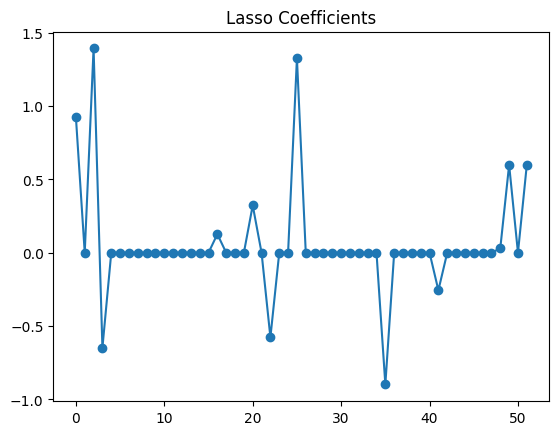

In [25]:
import matplotlib.pyplot as plt

# Plot Lasso coefficients
plt.plot(lasso.coef_, marker='o')
plt.title('Lasso Coefficients')
plt.show()


This code visualizes the coefficients of a trained Lasso regression model:

* plt.plot(lasso.coef_, marker='o'): Plots the Lasso regression coefficients as a line plot, with each coefficient represented by a marker ('o').
* plt.title('Lasso Coefficients'): Sets the title of the plot to "Lasso Coefficients".
* plt.show(): Displays the plot.


This helps you understand which features have non-zero coefficients and their relative importance after Lasso regularization.